In [1]:
import brainsurf.data.mff as input_load

In [2]:
meditator = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Meditators/Suriya/M1.mff")
non_meditator = input_load.convert_mff_to_eegdata("C:/Users/Preethi V Hiremath/Downloads/Non_meditators/Sub1/Seg/D1.mff")

Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Meditators\Suriya\M1.mff...
    Reading events ...
    Assembling measurement info ...
Reading EGI MFF Header from C:\Users\Preethi V Hiremath\Downloads\Non_meditators\Sub1\Seg\D1.mff...
    Reading events ...
    Assembling measurement info ...


# PRE PROCESSING

In [3]:
meditator.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E121,E122,E123,E124,E125,E126,E127,E128,Vertex Reference,sec
0,-0.014920,-0.009318,0.004059,0.003306,0.002380,0.003161,0.007059,-0.015804,-0.008883,0.008638,...,-0.015347,-0.010561,-0.005843,0.002486,-0.019884,-0.016401,-0.011726,-0.019155,0.0,0.000
1,-0.015009,-0.009394,0.003997,0.003253,0.002332,0.003201,0.007086,-0.015878,-0.008950,0.008585,...,-0.015437,-0.010651,-0.005912,0.002427,-0.019968,-0.016466,-0.011767,-0.019246,0.0,0.004
2,-0.014961,-0.009350,0.004024,0.003267,0.002339,0.003178,0.007058,-0.015839,-0.008915,0.008595,...,-0.015385,-0.010602,-0.005876,0.002452,-0.019929,-0.016434,-0.011739,-0.019192,0.0,0.008
3,-0.014880,-0.009282,0.004073,0.003305,0.002369,0.003137,0.007030,-0.015774,-0.008854,0.008632,...,-0.015305,-0.010525,-0.005817,0.002502,-0.019857,-0.016377,-0.011699,-0.019111,0.0,0.012
4,-0.014860,-0.009267,0.004090,0.003332,0.002397,0.003127,0.007034,-0.015759,-0.008838,0.008659,...,-0.015285,-0.010500,-0.005799,0.002522,-0.019834,-0.016360,-0.011697,-0.019091,0.0,0.016


In [4]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30
sampling_freq= 250

In [5]:
import brainsurf.preprocessing.filtering as filter
meditator_bandpass_filtered_eeg = filter.butter_bandpass_filter(meditator['E2'], lowcut,highcut , sampling_freq, order) 
novice_bandpass_filtered_eeg = filter.butter_bandpass_filter(non_meditator['E2'], lowcut,highcut , sampling_freq, order) 

# Feature Extraction

In [6]:
import brainsurf.analysis.stats_analysis as stats

In [7]:
meditator_mean=stats.calculate_mean(meditator_bandpass_filtered_eeg)
print(meditator_mean)
novice_mean = stats.calculate_mean(novice_bandpass_filtered_eeg)
print(novice_mean)

-3.9130690294213494e-10
-2.231602252821062e-09


In [8]:
meditator_std=stats.calculate_std(meditator_bandpass_filtered_eeg)
print(meditator_std)
novice_std = stats.calculate_std(novice_bandpass_filtered_eeg)
print(novice_std)

0.00017885579080848863
0.00023463181653458147


In [9]:
meditator_varience=stats.calculate_variance(meditator_bandpass_filtered_eeg)
print(meditator_varience)
novice_varience = stats.calculate_variance(novice_bandpass_filtered_eeg)
print(novice_varience)

3.198939390572985e-08
5.505208933031749e-08


In [10]:
meditator_skw=stats.calculate_skewness(meditator_bandpass_filtered_eeg)
print(meditator_skw)
novice_skw = stats.calculate_skewness(novice_bandpass_filtered_eeg)
print(novice_skw)

-11.066353090307095
-2.9841539309504834


In [11]:
meditator_kurtosis=stats.calculate_kurtosis(meditator_bandpass_filtered_eeg)
print(meditator_kurtosis)
novice_kurtosis = stats.calculate_kurtosis(novice_bandpass_filtered_eeg)
print(novice_kurtosis)

755.1737859348008
131.5877122160056


In [12]:
import pandas as pd
coherence = stats.calculate_coherence(meditator_bandpass_filtered_eeg, novice_bandpass_filtered_eeg,250)
# print(coherence)
freqs= coherence[0]
coh= coherence[1]
df = pd.DataFrame({'Frequency': freqs, 'Coherence': coh})

# Print the DataFrame
print(df.head())

   Frequency  Coherence
0   0.000000   0.961557
1   0.244141   0.984240
2   0.488281   0.975350
3   0.732422   0.915151
4   0.976562   0.557080


In [13]:
import brainsurf.analysis.power_spectrum as psd
frequence_bands_meditator = psd.extract_frequency_bands(meditator_bandpass_filtered_eeg)

In [14]:
alpha = frequence_bands_meditator['alpha']
beta = frequence_bands_meditator['beta']
theta = frequence_bands_meditator['theta']
delta = frequence_bands_meditator['delta']
gamma = frequence_bands_meditator['gamma']
meditator_freq = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta,'gamma': gamma})
print(meditator_freq.dropna())


           alpha          beta         delta         theta         gamma
0   5.012374e-13  8.828486e-11  2.235162e-08  4.298447e-12  1.299898e-15
1   3.351821e-13  1.019573e-10  6.576591e-12  1.743725e-12  7.953471e-16
2   8.991344e-13  8.926519e-11  7.831676e-12  1.939574e-11  1.370100e-15
3   1.094131e-12  1.020741e-10  4.313287e-12  9.290703e-12  8.235895e-15
4   3.007268e-12  9.080910e-11  5.939755e-12  1.302084e-11  2.095523e-14
..           ...           ...           ...           ...           ...
70  5.296474e-13  1.259944e-10  9.089785e-12  8.860916e-12  1.075755e-15
71  4.861165e-13  1.222576e-10  5.431560e-12  7.918833e-12  1.914635e-15
72  5.513148e-13  9.599491e-11  5.173220e-12  6.565485e-12  2.045520e-15
73  6.890595e-13  9.199370e-11  4.867446e-12  6.672556e-12  1.161977e-15
74  6.529665e-13  1.427356e-10  7.070122e-12  7.672763e-12  1.393986e-15

[75 rows x 5 columns]


In [15]:
frequence_bands_novice = psd.extract_frequency_bands(novice_bandpass_filtered_eeg)


In [25]:
alpha = frequence_bands_novice['alpha']
beta = frequence_bands_novice['beta']
theta = frequence_bands_novice['theta']
delta = frequence_bands_novice['delta']
gamma = frequence_bands_novice['gamma']
noive_freq = pd.DataFrame({'alpha': alpha, 'beta': beta, 'delta': delta, 'theta': theta,'gamma': gamma})
print(noive_freq.dropna())

           alpha          beta         delta         theta         gamma
0   3.063574e-13  1.776723e-09  1.553873e-08  1.396612e-12  1.828644e-15
1   1.802009e-13  1.760938e-09  5.002611e-12  5.626919e-13  1.119133e-15
2   1.655363e-13  1.834271e-09  8.703969e-12  4.641338e-13  1.167745e-15
3   2.764609e-13  1.808907e-09  2.348452e-12  9.904388e-13  1.123110e-15
4   2.558860e-13  1.810950e-09  5.386243e-12  7.173028e-13  1.377699e-15
..           ...           ...           ...           ...           ...
70  2.442008e-13  1.612843e-09  3.539052e-12  8.339734e-13  1.036721e-15
71  2.776996e-13  1.677124e-09  6.562653e-11  1.062477e-12  2.219459e-15
72  2.418272e-13  1.555655e-09  1.267160e-10  1.546055e-12  1.513389e-15
73  4.690506e-13  1.498870e-09  8.860870e-11  2.744083e-12  1.375706e-15
74  3.355181e-13  1.543813e-09  5.324791e-12  1.419739e-12  8.044020e-16

[75 rows x 5 columns]


In [26]:
freq_meditator=meditator_freq.dropna()
freq_novice=noive_freq.dropna()

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

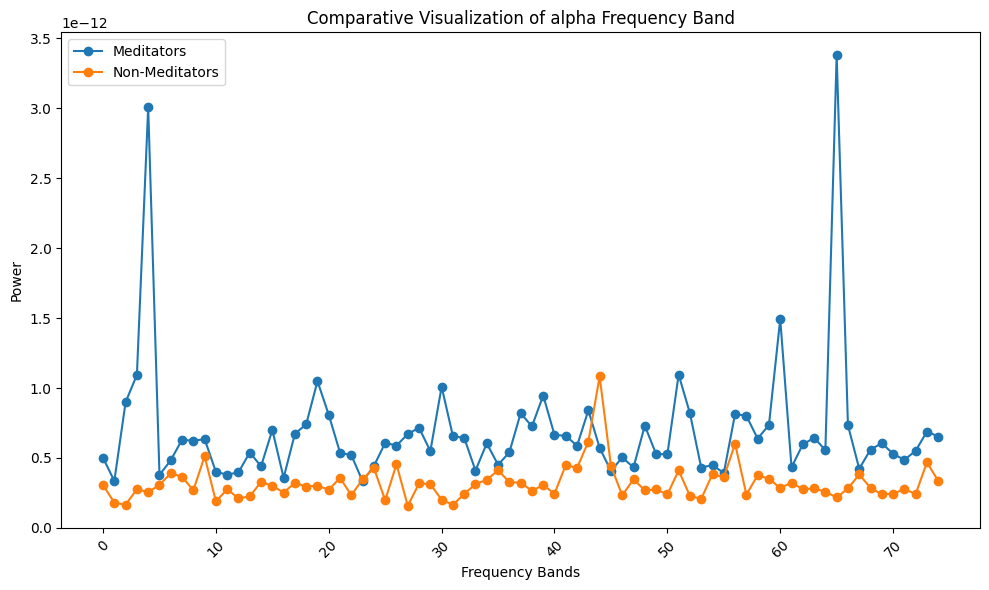

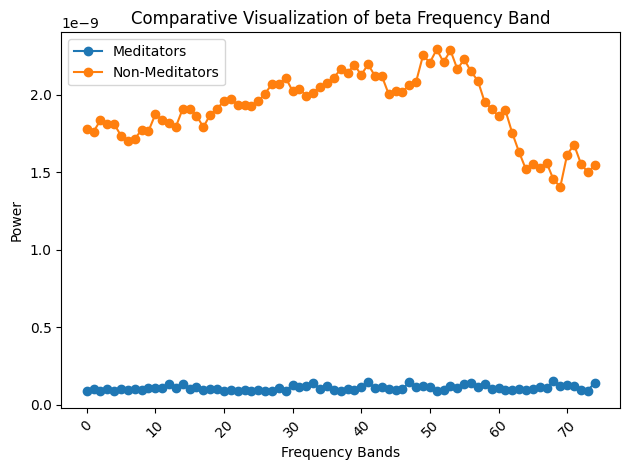

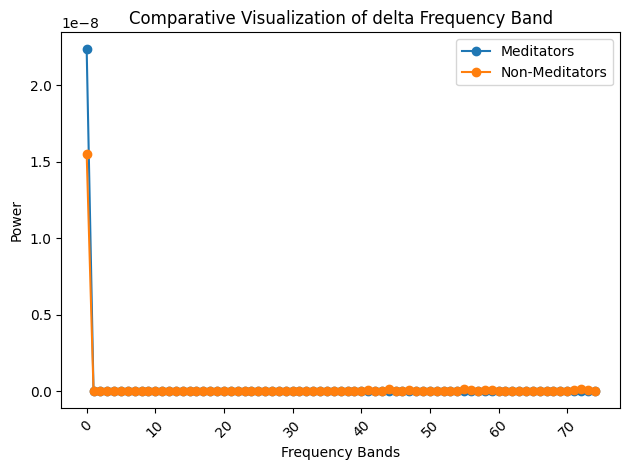

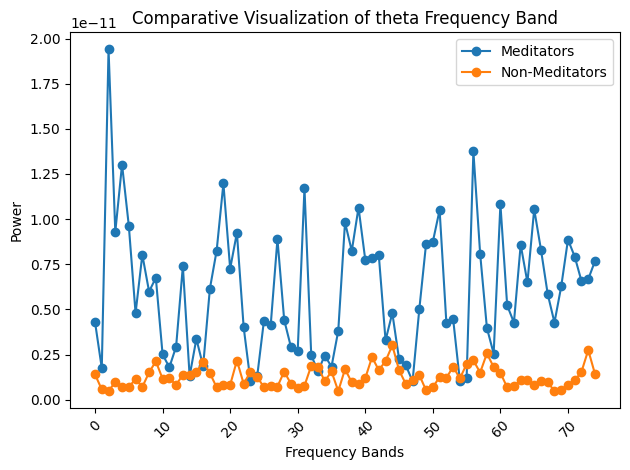

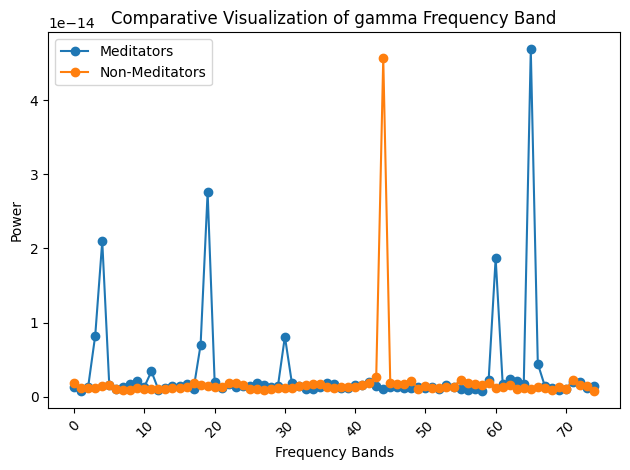

In [28]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Iterate through each frequency band column
for band in freq_meditator.columns:
    # Plot the meditators data
    plt.plot(freq_meditator.index, freq_meditator[band], marker='o', linestyle='-', label='Meditators')

    # Plot the non-meditators data
    plt.plot(freq_novice.index, freq_novice[band], marker='o', linestyle='-', label='Non-Meditators')

    # Add labels and title
    plt.xlabel('Frequency Bands')
    plt.ylabel('Power')
    plt.title(f'Comparative Visualization of {band} Frequency Band')
    plt.xticks(rotation=45)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


In [29]:
import brainsurf.data.comparative_visualize as compare
factory = compare.ComparativeVisualizationFactory()


In [30]:
freq_meditator['raw'] = meditator['E2']
freq_novice['raw'] = non_meditator['E2']

C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_18628\379902387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_meditator['raw'] = meditator['E2']
C:\Users\Preethi V Hiremath\AppData\Local\Temp\ipykernel_18628\379902387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_novice['raw'] = non_meditator['E2']


In [31]:
freq_meditator

,alpha,beta,delta,theta,gamma,raw
0,5.012374e-13,8.828486e-11,2.235162e-08,4.298447e-12,1.299898e-15,-0.009318
1,3.351821e-13,1.019573e-10,6.576591e-12,1.743725e-12,7.953471e-16,-0.009394
2,8.991344e-13,8.926519e-11,7.831676e-12,1.939574e-11,1.370100e-15,-0.009350
3,1.094131e-12,1.020741e-10,4.313287e-12,9.290703e-12,8.235895e-15,-0.009282
4,3.007268e-12,9.080910e-11,5.939755e-12,1.302084e-11,2.095523e-14,-0.009267
...,...,...,...,...,...,...
70,5.296474e-13,1.259944e-10,9.089785e-12,8.860916e-12,1.075755e-15,-0.009376
71,4.861165e-13,1.222576e-10,5.431560e-12,7.918833e-12,1.914635e-15,-0.009388
72,5.513148e-13,9.599491e-11,5.173220e-12,6.565485e-12,2.045520e-15,-0.009324
73,6.890595e-13,9.199370e-11,4.867446e-12,6.672556e-12,1.161977e-15,-0.009291


In [32]:
# change the location of function
import brainsurf.cognitive_analysis_module.cognitive_comparision as stats

stats = stats.compare_eeg_data_stats(freq_meditator,freq_novice)
stats

,Feature,T-Stat,P-Value (T-Test),F-Stat,P-Value (ANOVA),Effect Size
0,EEG,-51.136124,5.836790e-96,2614.903223,5.836790e-96,32.603907
1,Alpha,6.679429,4.538255e-10,44.614767,4.538255e-10,0.799996
2,Beta,-71.351866,1.572734e-116,5091.088735,1.572734e-116,109.099689
3,Theta,11.223020,1.557517e-21,125.956181,1.557517e-21,1.312002
4,Delta,0.209555,8.343034e-01,0.043913,8.343034e-01,0.029461
